In [67]:
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리

In [68]:
my_image_path = 'C:\\Users\\tkdwl\\AIFFEL_quest_rs\\Example\\Project00X\\images\\흑인.jpg' # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

AttributeError: 'NoneType' object has no attribute 'copy'

In [ ]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

In [ ]:
for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

In [ ]:
landmark_predictor = dlib.shape_predictor("C:\\Users\\tkdwl\\AIFFEL_quest_rs\\Example\\Project00X\\shape_predictor_68_face_landmarks.dat") # dlib의 얼굴 랜드마크 예측기 로드

In [ ]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

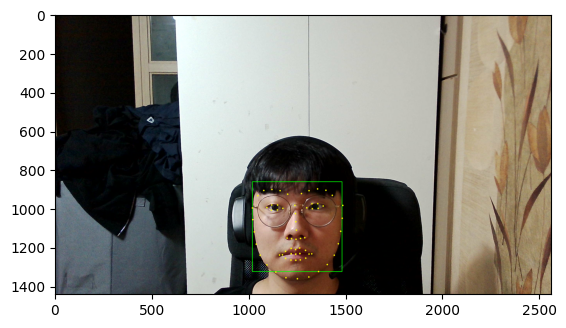

In [ ]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 4, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

In [ ]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] + dlib_rect.height()//2 # 이미지에서 코 부위의 y값 + 얼굴 영역의 세로를 차지하는 픽셀의 수의 절반
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 
    

In [ ]:
sticker_path = 'C:\\Users\\tkdwl\\AIFFEL_quest_rs\\Example\\Project00X\\images\\cat-whiskers.png' # 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환\
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
for i, img_sticker_row in enumerate(img_sticker):
    for j, pixel in enumerate(img_sticker_row):
        if (pixel == [255,255,255]).all(): # 스티커 이미지에서 배경 픽셀을 찾음
            img_sticker[i, j] = [0,0,0]
        else:
            img_sticker[i, j] = [255,255,255] 

In [ ]:
refined_x = x - w // 2 # 437 - (187//2) = 437-93 = 344
refined_y = y - h
if refined_x < 0:
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
# 왕관 이미지를 씌우기 위해 왕관 이미지가 시작할 y좌표 값 조정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] # refined_y가 -98이므로, img_sticker[98: , :]가 된다. (187, 187, 3)에서 (89, 187, 3)이 됨 (187개 중에서 98개가 잘려나감)
    refined_y = 0

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)    

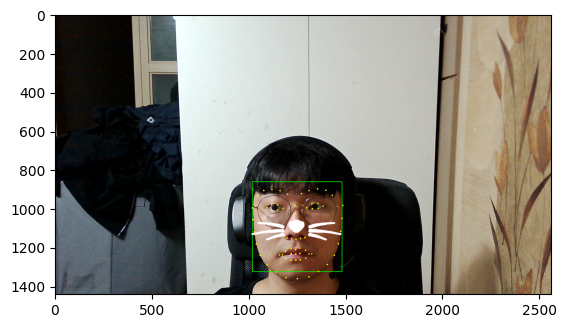

In [ ]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

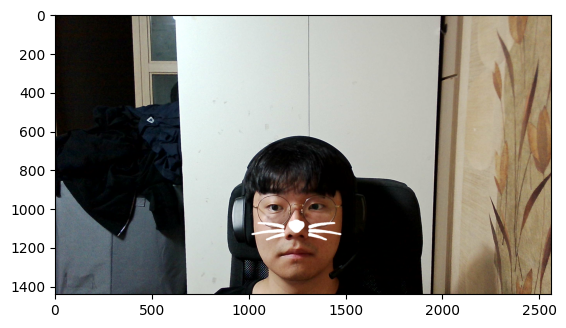

In [ ]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다.
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 스티커 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()

**변경사항**

고양이 수염 사진에 RGBA값을 이용하나 실습시에 사용한 코드에 적용하기에 적절하지 않았음 그렇기에 고양이 수염 사진의 배열에 추가적인 작업을 하여 실습과 호환이 가능하도록 하는 코드가 추가되어있음

### 카메라 스티커 앱의 문제점 ###

#### 1. 얼굴이 바라보는 각도에 따른 문제점 ####
얼굴이 정면을 볼때에는 잘 작동하나 얼굴을 삭짝이라도 돌려 측면을 보게된다면 이에 맞는 스티커의 크기 조정이 적절하게는 일어나지 않는다. 

보완한다면? 두 눈 사이의 거리를 반영한 스티커의 크기를 수정하는 방향이 더 좋아보인다.

#### 2. 얼굴 자체의 각도에 따른 문제점 ####
얼굴이 살짝이라도 기울어진다면 스티커도 같이 기울어지는 것이 더 합리적일 것이다 그러나 이 스티커 앱은 이러한 조정이 이루어 지지 않는다.

보완한다면? 두 눈을 잇는 직선과 코를 마킹하는 직선의 각도 차이를 반영하여 이미지도 각도를 돌린다면 가능할 것이다.

#### 3. 빛과 거리에 따른 문제점 ####
이미지를 인식하는 거의 모든 상황에서 발생할 수 있는 문제점이다. 빛이 너무 강하거나 거리가 너무 멀어 얼굴을 제대로 인식할 수 없는 수준이 된다면 얼굴을 인식하지 못해 스티커를 붙이지 못할것이다.

보완한다면? ...

#### 4. 문제점이 아닌 개선점 음영이 없다 ####
사진속 음영이 추가된 부분에 같이 음영이 들어간다면 조금 더 좋은 이미지가 될 것 같음